In [1]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import imageio as imageio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from tqdm import tqdm

In [2]:
order = ['Other', 'Setosa']
virginica_order = ['Other', 'Virginica']

In [3]:


def plot_decision_regions(X, y, classifier, palette, resolution=0.02, same_aspect=False):

    markers = ('o', 'o', 'o', 'o', 'o')

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette)
    plt.autoscale(False)

    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [4]:
out_dir = os.path.join(os.getcwd(), "../../out/classification")

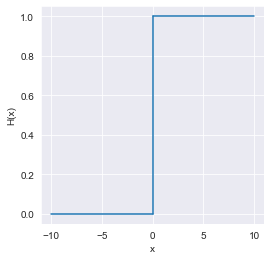

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot([-10, 0], [0, 0], color=sns.color_palette()[0])
ax.plot([0, 0], [0, 1], color=sns.color_palette()[0])
ax.plot([0, 10], [1, 1], color=sns.color_palette()[0])
ax.set_xlabel("x")
ax.set_ylabel("H(x)")
plt.savefig(os.path.join(out_dir, 'heaviside.png'))

In [6]:
from sklearn.preprocessing import StandardScaler

# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['sepal length', 'sepal width', 'petal length', 'petal width', 'name']].rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)',
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)',
})

numeric_cols = [
    'sepal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'petal width (cm)'
]
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

df['setosa'] = df['name'].apply(lambda name: 'Setosa' if name == 'Setosa' else 'Other')
df['versicolor'] = df['name'].apply(lambda name: 'Versicolor' if name == 'Versicolor' else 'Other')
df['virginica'] = df['name'].apply(lambda name: 'Virginica' if name == 'Virginica' else 'Other')

display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,setosa,versicolor,virginica
0,-0.900681,1.032057,-1.341272,-1.312977,Setosa,Setosa,Other,Other
1,-1.143017,-0.124958,-1.341272,-1.312977,Setosa,Setosa,Other,Other
2,-1.385353,0.337848,-1.398138,-1.312977,Setosa,Setosa,Other,Other
3,-1.506521,0.106445,-1.284407,-1.312977,Setosa,Setosa,Other,Other
4,-1.021849,1.263460,-1.341272,-1.312977,Setosa,Setosa,Other,Other
...,...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Virginica,Other,Other,Virginica
146,0.553333,-1.281972,0.705893,0.922064,Virginica,Other,Other,Virginica
147,0.795669,-0.124958,0.819624,1.053537,Virginica,Other,Other,Virginica
148,0.432165,0.800654,0.933356,1.447956,Virginica,Other,Other,Virginica


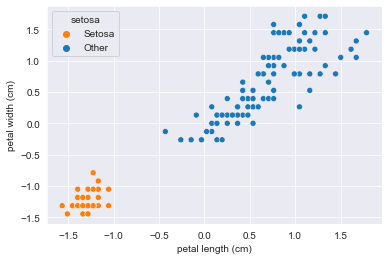

In [7]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='setosa', palette=dict(zip(
    order,
    sns.color_palette()
)))
plt.savefig(os.path.join(out_dir, 'example-data-only.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


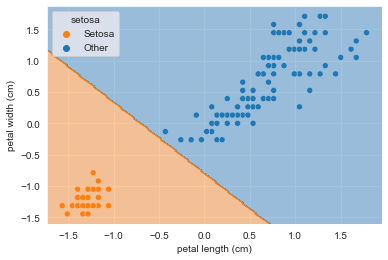

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


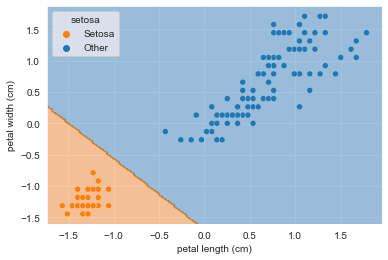

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


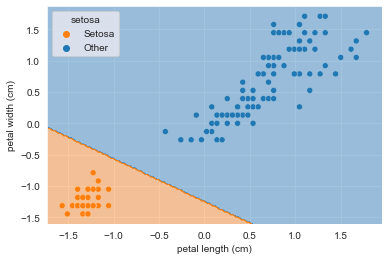

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


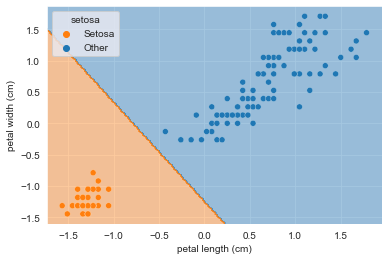

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


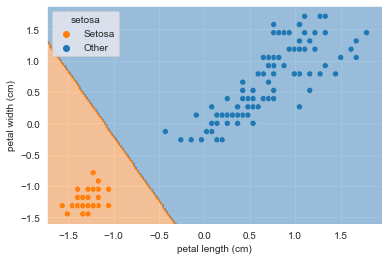

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


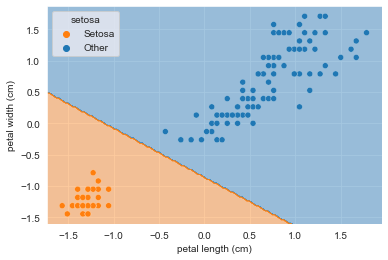

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


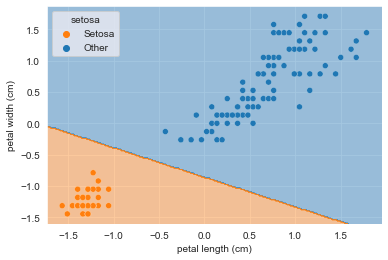

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-2.51569568 -2.21809318]]


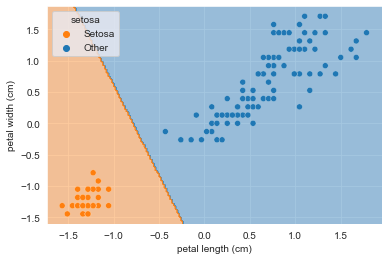

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

def inc_intercept(delta):
    def doit(clf):
        clf.intercept_ += delta
    return doit


def inc_coef(delta00, delta01):
    def doit(clf):
        clf.coef_[0][0] += delta00
        clf.coef_[0][1] += delta01
    return doit


def inc_coef00(delta):
    def doit(clf):
        clf.coef_[0][0] += delta
    return doit


def inc_coef01(delta):
    def doit(clf):
        clf.coef_[0][1] += delta
    return doit


for i, f in enumerate([
    inc_intercept(1),
    inc_intercept(-1),
    inc_coef00(1),
    inc_coef00(-1),
    inc_coef01(1),
    inc_coef01(-1),
    inc_coef(1, -1),
    inc_coef(-1, 1),
]):
    oe = OrdinalEncoder(categories=[order])
    ys = oe.fit_transform(df[['setosa']])
    clf = LogisticRegression()
    clf.fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)
    print(clf.coef_)
    f(clf)
    plot_decision_regions(
        df[['petal length (cm)', 'petal width (cm)']].values, df['setosa'], clf,
        palette=dict(zip(
          order,
          sns.color_palette()
        )))
    plt.savefig(os.path.join(out_dir, f'classification-model-{i}.png'), bbox_inches='tight')
    plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


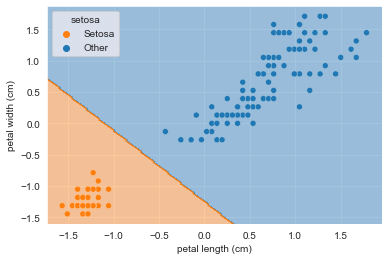

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

oe = OrdinalEncoder(categories=[order])
ys = oe.fit_transform(df[['setosa']])
clf = LogisticRegression()

clf.fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)

plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['setosa'], clf,
                      palette=dict(zip(
                          order,
                          sns.color_palette()
                      )))
plt.savefig(os.path.join(out_dir, 'logistic-regression-2d.png'), bbox_inches='tight')
plt.show()

In [10]:
from sklearn.svm import LinearSVC

oe = OrdinalEncoder(categories=[order])
ys = oe.fit_transform(df[['setosa']])
clf = LinearSVC()

clf.fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

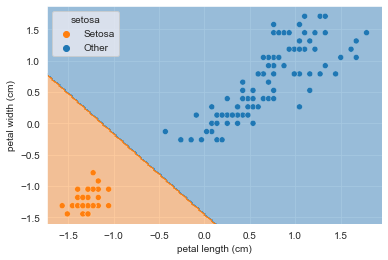

In [11]:
plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['setosa'], clf,
    palette=dict(zip(
        order,
        sns.color_palette()
)))
plt.savefig(os.path.join(out_dir, 'support-vector-machine-2d.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


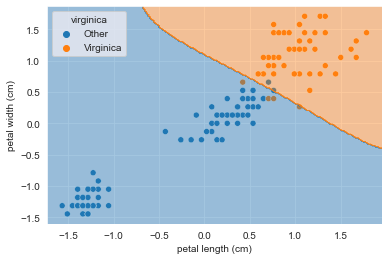

In [12]:
oe = OrdinalEncoder(categories=[virginica_order])
ys = oe.fit_transform(df[['virginica']])
clf = SVC()

clf.fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)
plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['virginica'], clf,
                      palette=dict(zip(
                          virginica_order,
                          sns.color_palette()
                      )))
plt.savefig(os.path.join(out_dir, 'example-data-with-model.png'), bbox_inches='tight')
plt.show()

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


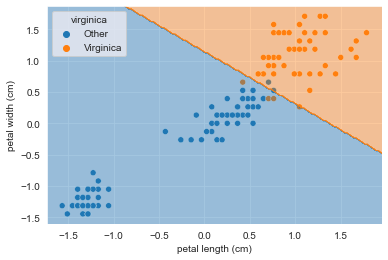

In [13]:
from sklearn.linear_model import LogisticRegression

oe = OrdinalEncoder(categories=[virginica_order])
ys = oe.fit_transform(df[['virginica']])
clf = LogisticRegression()

clf.fit(df[['petal length (cm)', 'petal width (cm)']].values, ys)
plot_decision_regions(df[['petal length (cm)', 'petal width (cm)']].values, df['virginica'], clf,
                      palette=dict(zip(
                          virginica_order,
                          sns.color_palette()
                      )))
plt.savefig(os.path.join(out_dir, 'example-data-with-model.png'), bbox_inches='tight')
plt.show()